# TP réaliser par le quadrinome : 
- AIT AMARA Mohamed, 181831072170
- BOUROUINA Rania, 181831052716
- CHIBANE Ilies, 181831072041
- HAMMAL Ayoub, 181831048403

# TP 1 Mesures de performance
Dans ce TP, nous aimerions avoir un premier apperçu sur les algorithmes d'apprentissage automatique. Plus précisément, nous aimerions évaluer leurs performances en utilisant les métriques suivantes:
- Matrice de confusion
- Rappel
- Précision
- Taux de FP
- Spécificité
- Courbe ROC

Les mesures devront être calculées sur la tâche de classification de nombres manuscrits.

Le travail consiste à implementer ces métriques et à les comparer avec les métriques des librairies disponibles.

Les algorithmes : K plus Proches Voisins devront être implementés.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from numpy import random
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Pour RNC
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

# Lecture des fichiers de données à classifier
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [3]:
# données
X = np.genfromtxt('data.csv', delimiter=',', dtype=int)
X.shape

(5000, 400)

In [4]:
# étiquettes
Y = np.genfromtxt('labels.csv', delimiter=',', dtype=int)
Y[Y == 10] = 0
Y.shape

(5000,)

Afficher aléatoirement quelques données de notre base

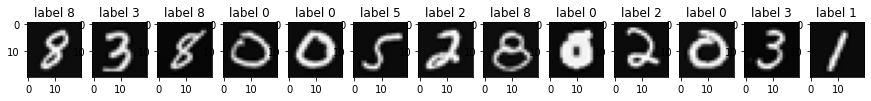

In [5]:
plt.figure(figsize=(15,8))
for i in range(13):
    c = random.randint(X.shape[0])
    a = X[c,:].reshape((20, 20))
    a=np.transpose(a)
    plt.subplot(1,13,i+1)
    plt.title('label '+ str(Y[c]))
    plt.imshow(a,cmap='gray')

Notons que l'étiquette 10 concerne le chiffre 0. L'étiquette a été utilisée ainsi afin de faciliter les calculs conséquents.

# Implémentation des métriques demandées
Ici il faut écrire les fonctions, puis les appeler dans la suite du code

- Matrice de confusion

In [6]:
def confusion_matrix(y_true, y_pred):
    #On obtient les classes distinctes et leurs nombres
    y_true_no_duplicate = sorted(set(y_true))
    n = len(y_true_no_duplicate)
    #On intialise la matricde de confusion
    matrix = np.zeros((n,n), dtype=np.int32)
    
    for i in range(len(y_true)):
        matrix[y_true_no_duplicate.index(y_true[i])][y_true_no_duplicate.index(y_pred[i])] += 1
    
    return matrix

- Rappel


In [7]:
def Recall(y_true, y_pred):
    mat = confusion_matrix(y_true, y_pred)
    Nbr = len(sorted(set(y_true)))
    i = 0
    tp = 0
    fn = 0
    recall = []
    for i in range(Nbr):
        tp = mat[i][i]
        fn = mat[i,(i+1):].sum() + mat[i,:i].sum()
        recall.append(0 if (tp+fn) == 0 else (tp/(tp+fn)))
    return recall[0] if Nbr == 2 else recall

- Précision

In [8]:
def Precision(y_true, y_pred):
    mat = confusion_matrix(y_true, y_pred)
    Nbr = len(sorted(set(y_true)))
    i = 0
    tp = 0
    fp = 0
    precision = []
    for i in range(Nbr):
        tp = mat[i][i]
        fp = mat[(i+1):,i].sum() + mat[:i,i].sum()
        precision.append(0 if (tp+fp) == 0 else (tp/(tp+fp)))
    return precision[0] if Nbr == 2 else precision

- Taux de FP

In [9]:
def FPR(y_true, y_pred):
    mat = confusion_matrix(y_true, y_pred)
    Nbr = len(sorted(set(y_true)))
    i = 0
    tp = 0
    fp = 0
    fpr = []
    for i in range(Nbr):
        tp = mat[i][i]
        fp = mat[i,(i+1):].sum() + mat[i,:i].sum()
        fpr.append(0 if (tp+fp) == 0 else (fp/(tp+fp)))
    return fpr[0] if Nbr == 2 else fpr

- Spécificité

In [10]:
def Specificity(y_true, y_pred):
    mat = confusion_matrix(y_true, y_pred)
    Nbr = len(sorted(set(y_true)))
    i = 0
    tn = 0
    fp = 0
    specificity = []
    for i in range(Nbr):
        tp = mat[:i,:i].sum() + mat[(i+1):,:i].sum() + mat[:i,(i+1):].sum() + mat[(i+1):,(i+1):].sum()
        fp = mat[i,(i+1):].sum() + mat[i,:i].sum()
        specificity.append(0 if (tp+fp) == 0 else (tp/(tp+fp)))
    return specificity[0] if Nbr == 2 else specificity

- Courbe ROC

In [57]:
def ROC(y_true,y_pred,y_score):
    thresholds = [0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1,2]
    y_true_no_duplicate = sorted(set(y_true))

    All_roc = []

    for y in y_true_no_duplicate:
        indices = [i for i, x in enumerate(y_true) if x == y]
        fpr_array = []
        tpr_array = []
        for threshold in thresholds:
            tp = 0
            fp = 0
            tn = 0
            fn = 0
            for i in indices: 
                if(y_score[i][y_pred[i]] >= threshold):
                    if(y_true[i] == y_pred[i]):
                        tp += 1
                    else:
                        fp += 1
                elif(y_score[i][y_pred[i]] < threshold):
                    if(y_true[i] == y_pred[i]):
                        tn += 1
                    else:
                        fn += 1
            tpr = 0 if (tp+fn) == 0 else (tp/(tp+tn))
            fpr = 0 if (tn+fp) == 0 else (fp/(fn+fp))
            fpr_array.append(tpr)
            tpr_array.append(fpr)
        
        All_roc.append([tpr_array, fpr_array])
    
    
    plt.plot(All_roc[0][0],All_roc[0][1], color = 'blue')
    plt.plot(All_roc[1][0],All_roc[1][1], color = 'yellow')
    plt.plot(All_roc[2][0],All_roc[2][1], color = 'black')
    plt.plot(All_roc[3][0],All_roc[3][1], color = 'olive')
    plt.plot(All_roc[4][0],All_roc[4][1], color = 'green')
    plt.plot(All_roc[5][0],All_roc[5][1], color = 'pink')
    plt.plot(All_roc[6][0],All_roc[6][1], color = 'orange')
    plt.plot(All_roc[7][0],All_roc[7][1], color = 'brown')
    plt.plot(All_roc[8][0],All_roc[8][1], color = 'purple')
    plt.plot(All_roc[9][0],All_roc[9][1], color = 'red')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('All ROC Curves')

In [12]:
def metrics(Ytt, y_pred):
    print("Matrice de Confusion :")
    print(confusion_matrix(Ytt, y_pred))

    print("\nRappel :")
    recall = Recall(Ytt, y_pred)
    print(recall)
    print("Rappel mean = ", np.array(recall).mean())
    print('-------------------------------------------------------')

    print("Precision :")
    precision = Precision(Ytt, y_pred)
    print(precision)
    print("\nPrecision mean = ", np.array(precision).mean())

    print("Taux de FP :")
    fpr = FPR(Ytt, y_pred)
    print(fpr)
    print("\nTaux de FP mean = ", np.array(fpr).mean())
    print('-------------------------------------------------------')

    print("Specificite :")
    specificty = Specificity(Ytt, y_pred)
    print(specificty)
    print("\nSpecificty mean = ", np.array(specificty).mean(), end="")

# Classification

Définir d'abord la base d'entrainement Xt, Yt et la base de test Xtt, Ytt

In [13]:
tRatio=2/3
ttRatio=1/3
Xt, Xtt, Yt, Ytt = train_test_split(X,Y,test_size=ttRatio, train_size=tRatio,random_state=42)
print(Xt.shape,Xtt.shape,Yt.shape,Ytt.shape)

(3333, 400) (1667, 400) (3333,) (1667,)


# Méthode 0: K- Plus Proches Voisins

Ici il faudra implémenter la méthode, puis la tester et vérifier les métriques en variant le nombre K

In [14]:
def minkowski_distance(a, b, p):
        
    distance = np.linalg.norm(a-b)
    distance = pow(distance,p)
    return distance

In [15]:
def KPP(x, X, Y, Neighbors, distance):
    y_pred = []
    for a in x:
        distances = []
        for b in X:
            distances.append(minkowski_distance(a,b,distance))
        distances_sorted = distances.copy()
        distances_sorted.sort()
        distances_sorted = distances_sorted[:Neighbors]
        Closer_Points_Indexex = np.where(np.in1d(distances, distances_sorted))[0]
        Closer_Points_Classes = Y[Closer_Points_Indexex]
        y_pred.append(np.bincount(Closer_Points_Classes).argmax())
    return np.array(y_pred, dtype=int)

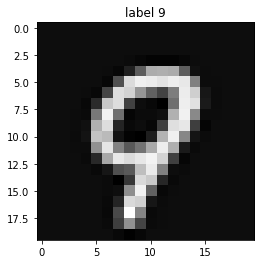

In [16]:
# tester une image
c= 69
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

In [17]:
y_pred = KPP(Xtt, Xt, Yt, 10, 1)

metrics(Ytt, y_pred)

Matrice de Confusion :
[[182   0   0   0   0   0   1   0   0   0]
 [  0 161   2   0   1   0   0   0   0   1]
 [  0   6 152   1   0   1   3   5   6   0]
 [  1   2   1 156   1   3   1   3   2   3]
 [  0   7   1   0 150   0   2   0   0   9]
 [  0   2   0   5   0 149   2   0   0   3]
 [  3   1   0   0   0   0 156   0   0   0]
 [  0   8   1   0   1   0   0 152   0   3]
 [  1   1   0   5   1   7   1   0 133   2]
 [  1   1   0   3   1   0   1   5   0 154]]

Rappel :
[0.994535519125683, 0.9757575757575757, 0.8735632183908046, 0.9017341040462428, 0.8875739644970414, 0.9254658385093167, 0.975, 0.9212121212121213, 0.8807947019867549, 0.927710843373494]
Rappel mean =  0.9263347886899034
-------------------------------------------------------
Precision :
[0.9680851063829787, 0.8518518518518519, 0.9681528662420382, 0.9176470588235294, 0.967741935483871, 0.93125, 0.9341317365269461, 0.9212121212121213, 0.9432624113475178, 0.88]

Precision mean =  0.9283335087870854
Taux de FP :
[0.00546448087431694, 

In [18]:
from sklearn.metrics import recall_score
recall_score(Ytt, y_pred, average=None).mean()

0.9263347886899034

# Méthode 1: MVS
Machine à Vecteurs de Support

In [55]:
#Créer le modèle
model= svm.SVC(kernel='linear', probability=True) 
# entrainement 
model.fit(Xt, Yt)
# Prediction
y_pred = model.predict(Xtt)
y_pred

array([3, 5, 5, ..., 8, 3, 2])

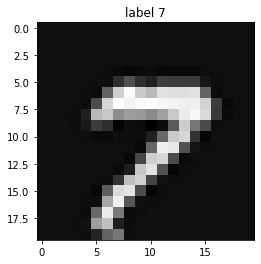

In [20]:
# tester une image
c= 45
y_pred[c]
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

In [21]:
metrics(Ytt, y_pred)

Matrice de Confusion :
[[181   0   1   0   0   1   0   0   0   0]
 [  0 160   1   0   1   1   0   0   0   2]
 [  1   1 154   4   4   1   2   0   7   0]
 [  1   2   4 156   1   3   0   1   4   1]
 [  0   0   3   0 152   0   1   2   2   9]
 [  1   2   1  10   1 144   2   0   0   0]
 [  3   0   1   0   1   1 154   0   0   0]
 [  1   2   1   2   4   0   0 153   1   1]
 [  0   2   5   2   0  11   2   1 128   0]
 [  2   0   0   2  12   1   0   4   0 145]]

Rappel :
[0.9890710382513661, 0.9696969696969697, 0.8850574712643678, 0.9017341040462428, 0.8994082840236687, 0.8944099378881988, 0.9625, 0.9272727272727272, 0.847682119205298, 0.8734939759036144]
Rappel mean =  0.9150326627552454
-------------------------------------------------------
Precision :
[0.9526315789473684, 0.9467455621301775, 0.9005847953216374, 0.8863636363636364, 0.8636363636363636, 0.8834355828220859, 0.9565217391304348, 0.9503105590062112, 0.9014084507042254, 0.9177215189873418]

Precision mean =  0.9159359787049484
Taux de

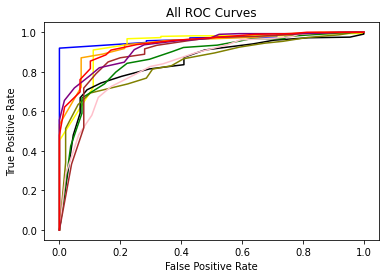

In [58]:
y_score = model.predict_proba(Xtt)
ROC(Ytt, y_pred, y_score)

# Méthode 2: Arbres de décision


In [59]:
# Créer le modèle
model = DecisionTreeClassifier()
# Entrainer le modèle
model = model.fit(Xt, Yt)
# Prediction
y_pred = model.predict(Xtt)

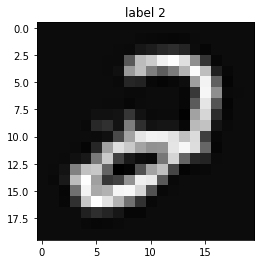

In [60]:
# tester une image
c= 3
y_pred[c]
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

In [25]:
metrics(Ytt, y_pred)

Matrice de Confusion :
[[166   0   1   5   0   5   3   1   0   2]
 [  0 144   5   3   1   1   1   4   2   4]
 [  4   2 112  12   4   6  10  10   9   5]
 [  2   3  11 111   3  16   3   3  10  11]
 [  0   2   4   1 134   0   3  10   2  13]
 [  3   1   4  14   1 121   4   4   6   3]
 [  5   1   6   2   2   9 128   1   2   4]
 [  1   6   4   6   0   3   0 129   5  11]
 [  2   2   7   7   5   5   5   1 108   9]
 [  1   1   1   4   8   9   3  15   5 119]]

Rappel :
[0.907103825136612, 0.8727272727272727, 0.6436781609195402, 0.6416184971098265, 0.7928994082840237, 0.7515527950310559, 0.8, 0.7818181818181819, 0.7152317880794702, 0.7168674698795181]
Rappel mean =  0.7623497398985501
-------------------------------------------------------
Precision :
[0.9021739130434783, 0.8888888888888888, 0.7225806451612903, 0.6727272727272727, 0.8481012658227848, 0.6914285714285714, 0.8, 0.7247191011235955, 0.7248322147651006, 0.6574585635359116]

Precision mean =  0.7632910436496895
Taux de FP :
[0.092896174

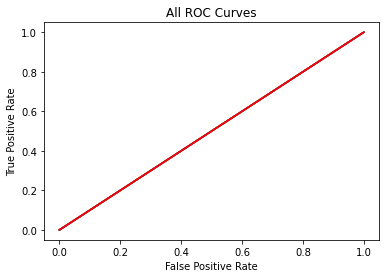

In [61]:
y_score = model.predict_proba(Xtt)
ROC(Ytt, y_pred, y_score)

# Méthode 3: RN 
Réseaux de neurones Perceptron

In [62]:
model = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(25),max_iter=100000)
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=0, test_size=0.7)
model.fit(Xt, Yt)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=25, max_iter=100000, solver='sgd')

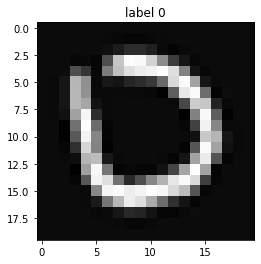

In [28]:
# Choisir un image de test 
c=0
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

In [47]:
y_pred = np.array(model.predict(Xtt), dtype=int)
y_pred

array([4, 1, 4, ..., 4, 4, 1])

In [30]:
metrics(Ytt, y_pred)

Matrice de Confusion :
[[  3   0   0   0 351   0   0   0   0   0]
 [  0 334   0   0  14   3   0   0   0   0]
 [  1   2   0   0 350   1   0   0   0   0]
 [  1   1   0   0 355   1   0   0   0   0]
 [  0   2   0   0 335   1   0   0   0   0]
 [  0   5   0   0 346   0   0   0   0   0]
 [  3   2   0   0 338   0   0   0   0   0]
 [  0   7   0   0 343   0   0   0   0   0]
 [  0   1   0   0 347   2   0   0   0   0]
 [  0   3   0   0 346   2   0   0   0   0]]

Rappel :
[0.00847457627118644, 0.9515669515669516, 0.0, 0.0, 0.9911242603550295, 0.0, 0.0, 0.0, 0.0, 0.0]
Rappel mean =  0.19511657881931677
-------------------------------------------------------
Precision :
[0.375, 0.9355742296918768, 0, 0, 0.1072, 0.0, 0, 0, 0, 0]

Precision mean =  0.14177742296918766
Taux de FP :
[0.9915254237288136, 0.04843304843304843, 1.0, 1.0, 0.008875739644970414, 1.0, 1.0, 1.0, 1.0, 1.0]

Taux de FP mean =  0.8048834211806832
-------------------------------------------------------
Specificite :
[0.89948453608247

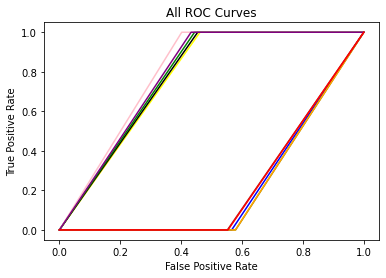

In [63]:
# pour ROC, il faudra les probabilités:
y_score = model.predict_proba(Xtt)
ROC(Ytt, y_pred, y_score)

Afficher l'image testée

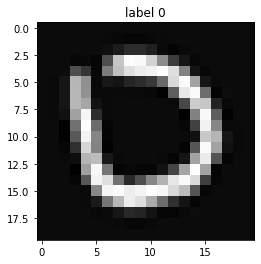

In [32]:
a = Xtt[c,:].reshape((20, 20))
a=np.transpose(a)
plt.title('label '+ str(Ytt[c]))
plt.imshow(a,cmap='gray')

# Méthode 4: RNC
Réseaux de Neurones Convolutifs

In [64]:
# reshape dataset to have a single channel
Xt, Xtt, Yt, Ytt = train_test_split(X, Y, random_state=42, test_size=0.7)

Xt_rnc = Xt.reshape((Xt.shape[0], 20, 20, 1))
Xtt_rnc = Xtt.reshape((Xtt.shape[0], 20, 20, 1))

In [65]:
# Recoder le valeurs
Yt_rnc = to_categorical(Yt)
Ytt_rnc = to_categorical(Ytt)

Xt_rncN = Xt_rnc.astype('float32')
Xtt_rncN = Xtt_rnc.astype('float32')

# normaliser
Xt_rncN = Xt_rncN / 255.0
Xtt_rncN = Xtt_rncN / 255.0

# definir le modèle RNC
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(20, 20, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))
# compiler le modèle
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(Xt_rncN, Yt_rnc, epochs = 20)

# evaluaer le modèle
_, acc = model.evaluate(Xtt_rncN, Ytt_rnc, verbose=0)

y_proba = np.array(model.predict(Xtt_rncN))



Epoch 1/20
47/47 [==============================] - 0s 6ms/step - loss: 1.0574 - accuracy: 0.6540
Epoch 2/20
47/47 [==============================] - 0s 6ms/step - loss: 0.3659 - accuracy: 0.8807
Epoch 3/20
47/47 [==============================] - 0s 7ms/step - loss: 0.2469 - accuracy: 0.9333
Epoch 4/20
47/47 [==============================] - 0s 5ms/step - loss: 0.2057 - accuracy: 0.9353
Epoch 5/20
47/47 [==============================] - 0s 6ms/step - loss: 0.1473 - accuracy: 0.9580
Epoch 6/20
47/47 [==============================] - 0s 6ms/step - loss: 0.1187 - accuracy: 0.9727
Epoch 7/20
47/47 [==============================] - 0s 6ms/step - loss: 0.1045 - accuracy: 0.9680
Epoch 8/20
47/47 [==============================] - 0s 6ms/step - loss: 0.0733 - accuracy: 0.9833
Epoch 9/20
47/47 [==============================] - 0s 7ms/step - loss: 0.0696 - accuracy: 0.9800
Epoch 10/20
47/47 [==============================] - 0s 7ms/step - loss: 0.0641 - accuracy: 0.9853
Epoch 11/20
47/47 [

In [66]:
y_pred = [np.array([], dtype=int)]
for yp in y_proba:
    y_pred = np.append(y_pred, np.where(yp == np.amax(yp)))
metrics(Ytt, y_pred)

Matrice de Confusion :
[[349   0   0   2   0   1   2   0   0   1]
 [  0 335   2   1   1   0   1   0   2   1]
 [  2   3 330  13   2   0   3   6   7   1]
 [  1   0  15 323   0   5   1   2   6   2]
 [  2   4   4   0 334   0   6   3   2   9]
 [  2   1   0  10   2 311   5   0   3   1]
 [  2   3   1   0   0   5 317   0   3   0]
 [  2   0   3   4   6   0   0 337   2   4]
 [  0   2  13  12   0   2   0   1 314   1]
 [  5   0   1   4   5   1   0  13   3 315]]

Rappel :
[0.9830985915492958, 0.9766763848396501, 0.8991825613079019, 0.9098591549295775, 0.9175824175824175, 0.9283582089552239, 0.9577039274924471, 0.9413407821229051, 0.9101449275362319, 0.9077809798270894]
Rappel mean =  0.9331727936142741
-------------------------------------------------------
Precision :
[0.9561643835616438, 0.9626436781609196, 0.8943089430894309, 0.8753387533875339, 0.9542857142857143, 0.9569230769230769, 0.9462686567164179, 0.930939226519337, 0.9181286549707602, 0.9402985074626866]

Precision mean =  0.933529959507

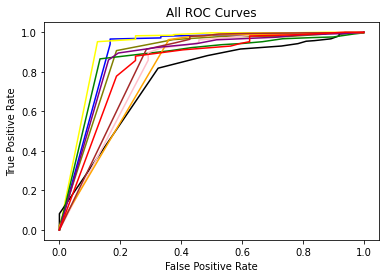

In [67]:
ROC(Ytt, y_pred, y_proba)

# Appliquer les métriques implementées pour voir le résultat

In [37]:
#Les métriques ont été appliquer en dessous de chaque modèle pour plus de clareté 

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 10 Mars 2022 à 22h

La partie RNC peut être laissée pour le prochain TP

In [38]:
# bonne chance